In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
heart_df = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter07/Dataset/heart.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_df.shape

(303, 14)

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Data Preprocessing

In [6]:
print('SEX', heart_df.sex.unique())
print("CP", heart_df.cp.unique())
print('FBS', heart_df.fbs.unique())
print('RESTECG', heart_df.restecg.unique())
print('EXANG', heart_df.exang.unique())
print('SLOPE', heart_df.slope.unique())
print('CA', heart_df.ca.unique())
print('TARGET', heart_df.target.unique())

SEX [1 0]
CP [3 2 1 0]
FBS [1 0]
RESTECG [0 1 2]
EXANG [0 1]
SLOPE [0 2 1]
CA [0 2 1 3 4]
TARGET [1 0]


In [7]:
preprocessed_df = heart_df.copy()

In [8]:
sex_map = {0:'Female', 1:'Male'}
cp_map = {0:'Typical angina', 1:'Atypical agngina',2:'Non-anginal pain', 3:'Asymptomatic'}
restecg_map = {0:'Normal', 1:'ST-T wave abnormality', 2:'Left ventricular hypertrophy'}
slope_map = {0:'Upsloping', 1:'Flat', 2:'Downsloping'}
yes_no_map = {0:'No', 1:'Yes'}


preprocessed_df.sex = preprocessed_df.sex.map(sex_map)
preprocessed_df.cp = preprocessed_df.cp.map(cp_map)
preprocessed_df.fbs = preprocessed_df.fbs.map(yes_no_map)
preprocessed_df.restecg = preprocessed_df.restecg.map(restecg_map)
preprocessed_df.exang = preprocessed_df.exang.map(yes_no_map)
preprocessed_df.slope = preprocessed_df.slope.map(slope_map)
preprocessed_df.target = preprocessed_df.target.map(yes_no_map)

In [9]:
column_map = {'cp' : 'chest_pain', 
              'trestbps' : 'rest_bp', 
              'fbs' : 'fast_bld_sugar', 
              'restecg' : 'rest_ecg', 
              'thalach' : 'max_hr', 
              'exang' : 'ex_angina', 
              'oldpeak' : 'st_depr', 
              'ca' : 'colored_vessels', 
              'thal' : 'thalassemia'}

preprocessed_df.rename(columns=column_map, inplace = True)
heart_df.rename(columns=column_map, inplace=True)

In [10]:
preprocessed_df.head()

,age,sex,chest_pain,rest_bp,chol,fast_bld_sugar,rest_ecg,max_hr,ex_angina,st_depr,slope,colored_vessels,thalassemia,target
0,63,Male,Asymptomatic,145,233,Yes,Normal,150,No,2.3,Upsloping,0,1,Yes
1,37,Male,Non-anginal pain,130,250,No,ST-T wave abnormality,187,No,3.5,Upsloping,0,2,Yes
2,41,Female,Atypical agngina,130,204,No,Normal,172,No,1.4,Downsloping,0,2,Yes
3,56,Male,Atypical agngina,120,236,No,ST-T wave abnormality,178,No,0.8,Downsloping,0,2,Yes
4,57,Female,Typical angina,120,354,No,ST-T wave abnormality,163,Yes,0.6,Downsloping,0,2,Yes


In [11]:
preprocessed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
rest_bp,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
max_hr,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
st_depr,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
colored_vessels,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0
thalassemia,303.0,2.313531,0.612277,0.0,2.0,2.0,3.0,3.0


In [12]:
preprocessed_df.describe(include='O').T

,count,unique,top,freq
sex,303,2,Male,207
chest_pain,303,4,Typical angina,143
fast_bld_sugar,303,2,No,258
rest_ecg,303,3,ST-T wave abnormality,152
ex_angina,303,2,No,204
slope,303,3,Downsloping,142
target,303,2,Yes,165


## Outlier Checking

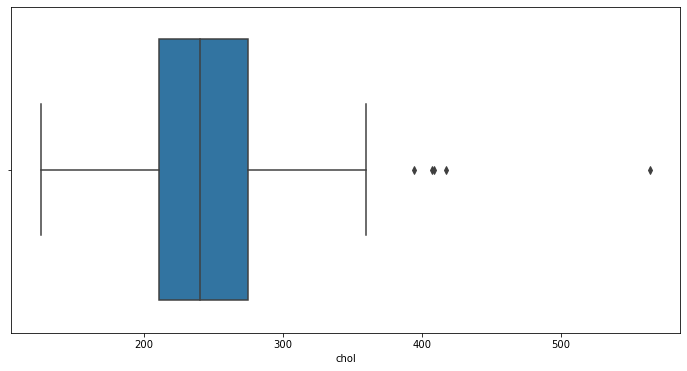

In [13]:
plt.rcParams['figure.figsize'] = [12,6]

sns.boxplot(preprocessed_df['chol'])
plt.show()

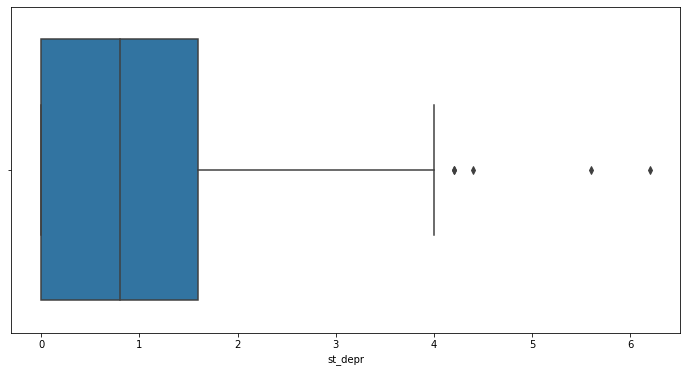

In [14]:
sns.boxplot(preprocessed_df['st_depr'])
plt.show()

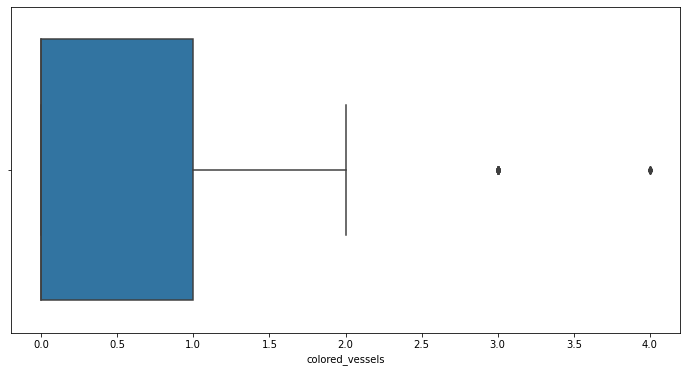

In [15]:
sns.boxplot(preprocessed_df['colored_vessels'])
plt.show()

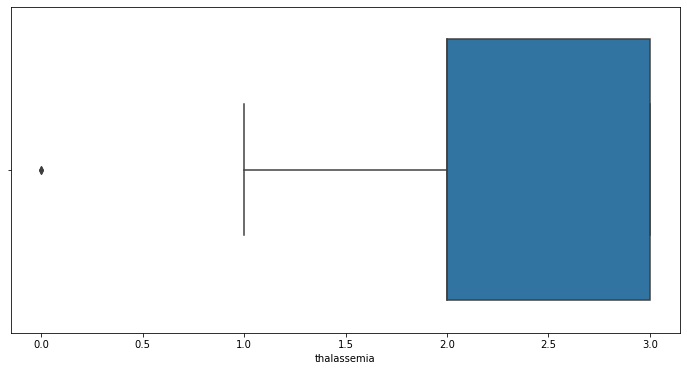

In [16]:
sns.boxplot(preprocessed_df['thalassemia'])
plt.show()

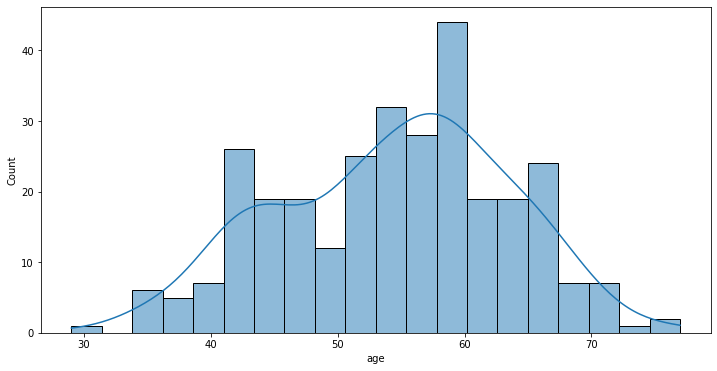

In [17]:
sns.histplot(data=preprocessed_df, x='age', kde=True, bins=20)
plt.show()

In [18]:
def plot_cat_count(df, col):
    
    sns.countplot(data=df, x=col)
    plt.show()
    
    print("Percentage share of each category:")
    print(df[col].value_counts(normalize=True)*100)

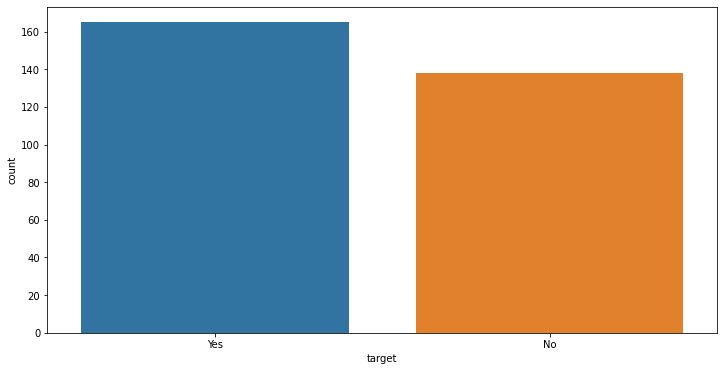

Percentage share of each category:
Yes    54.455446
No     45.544554
Name: target, dtype: float64


In [19]:
plot_cat_count(preprocessed_df, 'target')

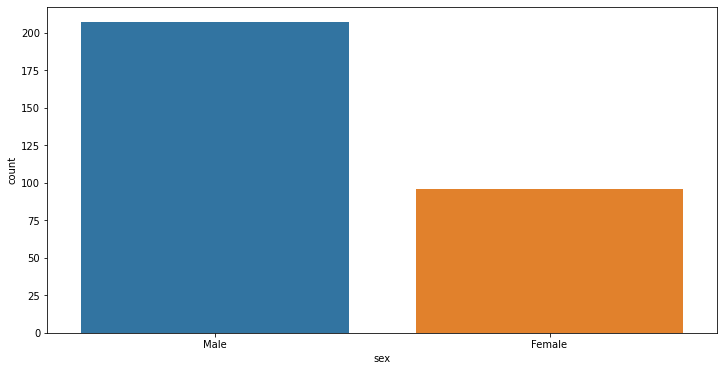

Percentage share of each category:
Male      68.316832
Female    31.683168
Name: sex, dtype: float64


In [20]:
plot_cat_count(preprocessed_df, 'sex')

## Bivariate Analysis

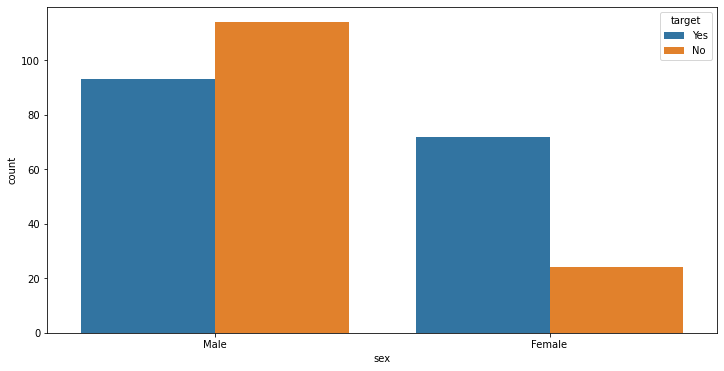

In [21]:
sns.countplot(data=preprocessed_df, x='sex', hue='target')
plt.show()

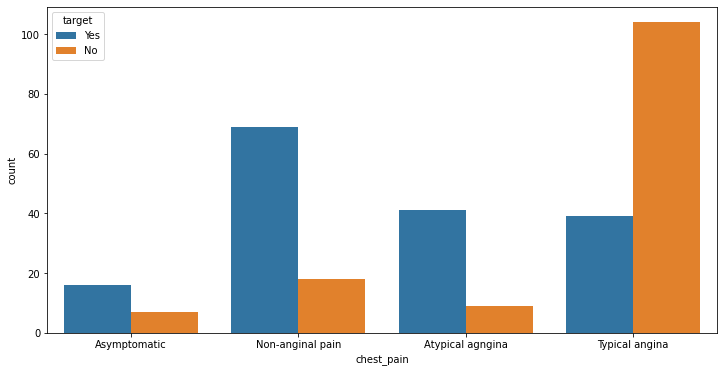

In [22]:
sns.countplot(data=preprocessed_df, x='chest_pain', hue='target')
plt.show()

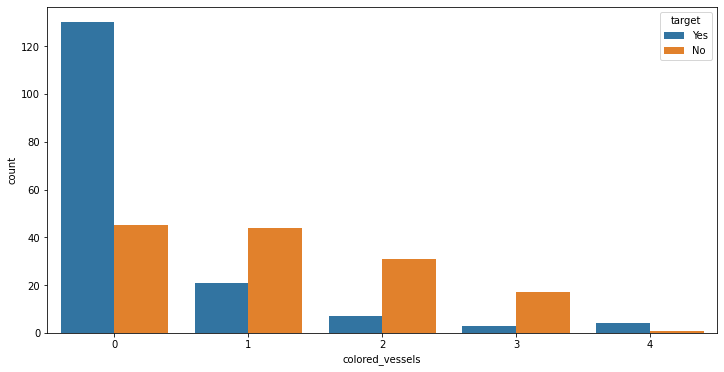

In [23]:
sns.countplot(data=preprocessed_df, x='colored_vessels', hue='target')
plt.show()

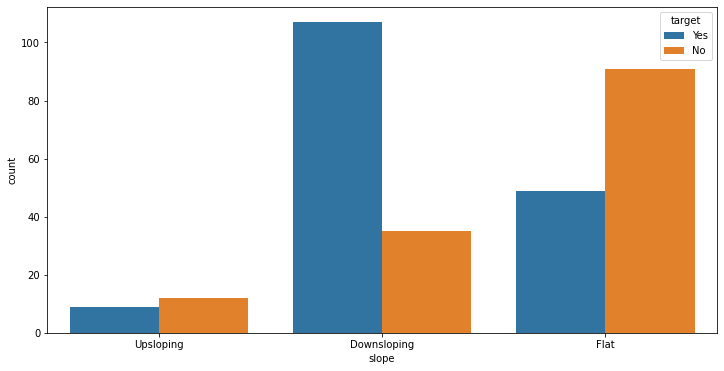

In [24]:
sns.countplot(data=preprocessed_df, x='slope', hue='target')
plt.show()

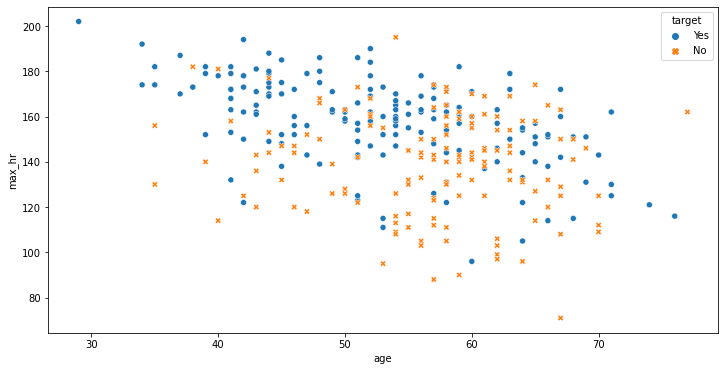

In [25]:
sns.scatterplot(data=preprocessed_df, x='age', y='max_hr', style='target', hue='target')
plt.show()

In [26]:
heart_df['age_category'] = pd.cut(heart_df.age, bins = list(np.arange(25, 85, 5)))
preprocessed_df['age_category'] = pd.cut(preprocessed_df.age, bins = list(np.arange(25, 85, 5)))

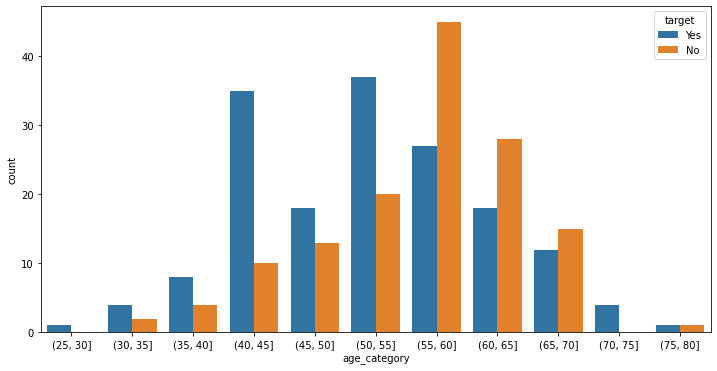

In [27]:
sns.countplot(data=preprocessed_df, x='age_category', hue='target')
plt.show()

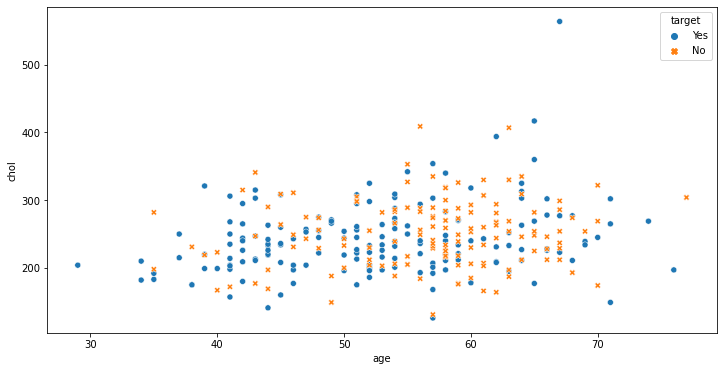

In [28]:
### presence of heart disease and cholestrol

sns.scatterplot(data=preprocessed_df, x='age', y='chol', style='target', hue='target')
plt.show()

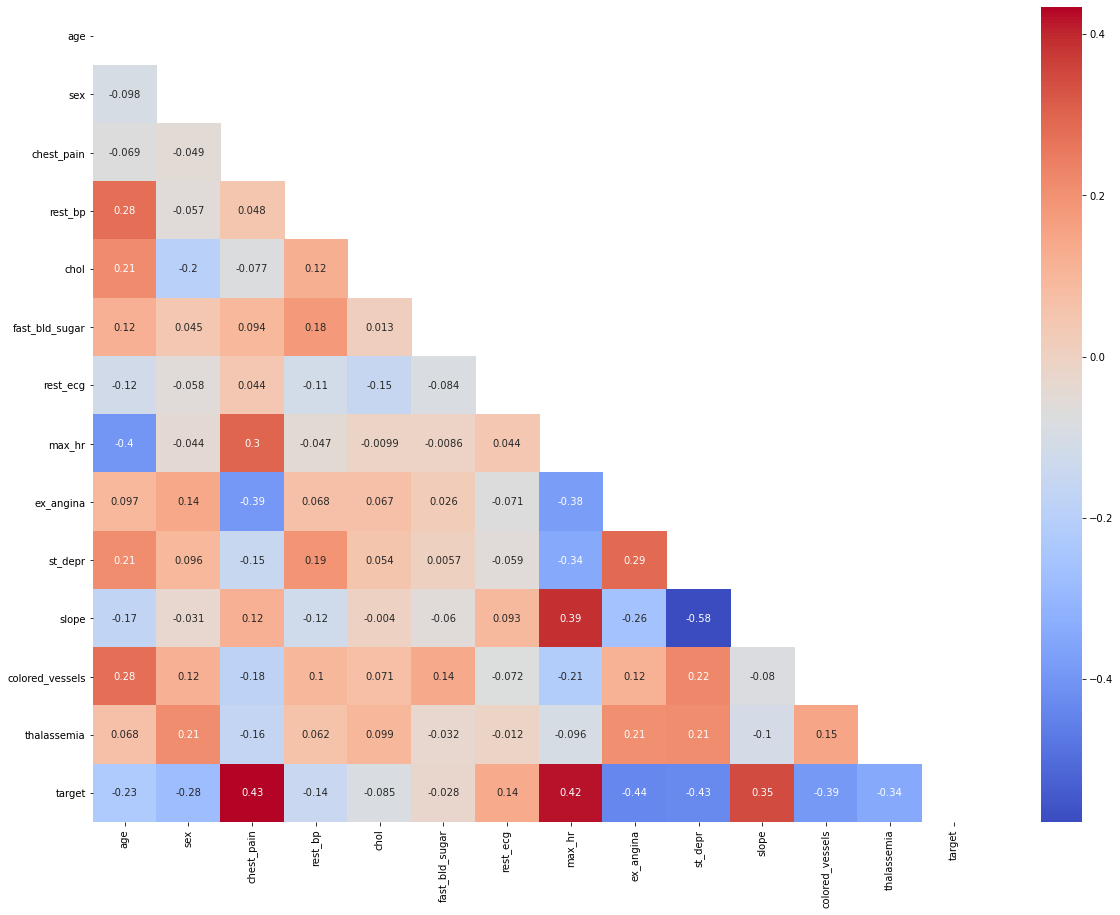

In [29]:
corr_matrix_pearson = heart_df.corr(method='pearson')

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix_pearson, cmap='coolwarm', annot=True, fmt='.2g', mask=np.triu(corr_matrix_pearson))
plt.show()

In [30]:
corr_matrix_pearson.loc[:, 'target']

age               -0.225439
sex               -0.280937
chest_pain         0.433798
rest_bp           -0.144931
chol              -0.085239
fast_bld_sugar    -0.028046
rest_ecg           0.137230
max_hr             0.421741
ex_angina         -0.436757
st_depr           -0.430696
slope              0.345877
colored_vessels   -0.391724
thalassemia       -0.344029
target             1.000000
Name: target, dtype: float64

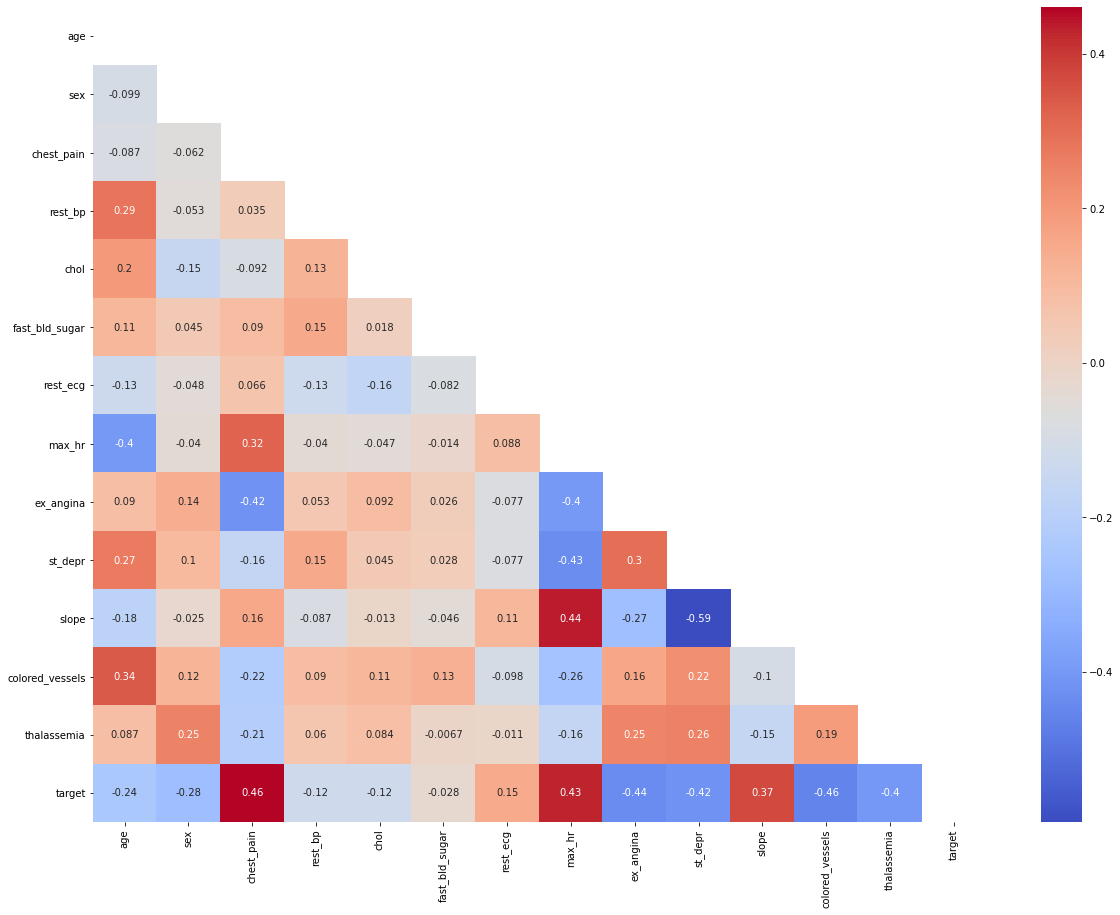

In [31]:
corr_matrix_spearman = heart_df.corr(method='spearman')

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix_spearman, cmap='coolwarm', annot=True, fmt='.2g', mask=np.triu(corr_matrix_spearman))
plt.show()

In [32]:
corr_matrix_spearman.loc[:, 'target']

age               -0.238400
sex               -0.280937
chest_pain         0.460860
rest_bp           -0.121593
chol              -0.120888
fast_bld_sugar    -0.028046
rest_ecg           0.148612
max_hr             0.428370
ex_angina         -0.436757
st_depr           -0.421487
slope              0.371460
colored_vessels   -0.457607
thalassemia       -0.403299
target             1.000000
Name: target, dtype: float64